# Build a regression model using Scikit-learn: regression four ways

### Introduction 

So far you have explored what regression is with sample data gathered from the pumpkin pricing dataset that we will use throughout this lesson. You have also visualized it using Matplotlib.

Now you are ready to dive deeper into regression for ML. While visualization allows you to make sense of data, the real power of Machine Learning comes from _training models_. Models are trained on historic data to automatically capture data dependencies, and they allow you to predict outcomes for new data, which the model has not seem before.

In this lesson, you will learn more about two types of regression: _basic linear regression_ and _polynomial regression_, along with some of the math underlying these techniques. Those models will allow us to predict pumpkin prices depending on different input data. 

> Throughout this curriculum, we assume minimal knowledge of math, and seek to make it accessible for students coming from other fields, so watch for notes, 🧮 callouts, diagrams, and other learning tools to aid in comprehension.

### Prerequisite

You should be familiar by now with the structure of the pumpkin data that we are examining. You can find it preloaded and pre-cleaned in this lesson's _notebook.ipynb_ file. In the file, the pumpkin price is displayed per bushel in a new data frame.  Make sure you can run these notebooks in kernels in Visual Studio Code.

### Preparation

As a reminder, you are loading this data so as to ask questions of it. 

- When is the best time to buy pumpkins? 
- What price can I expect of a case of miniature pumpkins?
- Should I buy them in half-bushel baskets or by the 1 1/9 bushel box?
Let's keep digging into this data.

In the previous lesson, you created a Pandas data frame and populated it with part of the original dataset, standardizing the pricing by the bushel. By doing that, however, you were only able to gather about 400 datapoints and only for the fall months. 

Take a look at the data that we preloaded in this lesson's accompanying notebook. The data is preloaded and an initial scatterplot is charted to show month data. Maybe we can get a little more detail about the nature of the data by cleaning it more.

## A linear regression line

As you learned in Lesson 1, the goal of a linear regression exercise is to be able to plot a line to:

- **Show variable relationships**. Show the relationship between variables
- **Make predictions**. Make accurate predictions on where a new datapoint would fall in relationship to that line. 
 
It is typical of **Least-Squares Regression** to draw this type of line. The term 'least-squares' means that all the datapoints surrounding the regression line are squared and then added up. Ideally, that final sum is as small as possible, because we want a low number of errors, or `least-squares`. 

We do so since we want to model a line that has the least cumulative distance from all of our data points. We also square the terms before adding them since we are concerned with its magnitude rather than its direction.

> **🧮 Show me the math** 
> 
> This line, called the _line of best fit_ can be expressed by [an equation](https://en.wikipedia.org/wiki/Simple_linear_regression): 
> 
> ```
> Y = a + bX
> ```
>
> `X` is the 'explanatory variable'. `Y` is the 'dependent variable'. The slope of the line is `b` and `a` is the y-intercept, which refers to the value of `Y` when `X = 0`. 
>
>![calculate the slope](images/slope.png)
>
> First, calculate the slope `b`. Infographic by [Jen Looper](https://twitter.com/jenlooper)
>
> In other words, and referring to our pumpkin data's original question: "predict the price of a pumpkin per bushel by month", `X` would refer to the price and `Y` would refer to the month of sale. 
>
>![complete the equation](images/calculation.png)
>
> Calculate the value of Y. If you're paying around $4, it must be April! Infographic by [Jen Looper](https://twitter.com/jenlooper)
>
> The math that calculates the line must demonstrate the slope of the line, which is also dependent on the intercept, or where `Y` is situated when `X = 0`.
>
> You can observe the method of calculation for these values on the [Math is Fun](https://www.mathsisfun.com/data/least-squares-regression.html) web site. Also visit [this Least-squares calculator](https://www.mathsisfun.com/data/least-squares-calculator.html) to watch how the numbers' values impact the line.

## Correlation

One more term to understand is the **Correlation Coefficient** between given X and Y variables. Using a scatterplot, you can quickly visualize this coefficient. A plot with datapoints scattered in a neat line have high correlation, but a plot with datapoints scattered everywhere between X and Y have a low correlation.

A good linear regression model will be one that has a high (nearer to 1 than 0) Correlation Coefficient using the Least-Squares Regression method with a line of regression.

✅ Run the notebook accompanying this lesson and look at the Month to Price scatterplot. Does the data associating Month to Price for pumpkin sales seem to have high or low correlation, according to your visual interpretation of the scatterplot? Does that change if you use more fine-grained measure instead of `Month`, eg. *day of the year* (i.e. number of days since the beginning of the year)?

In the code below, we will assume that we have cleaned up the data, and obtained a data frame called `new_pumpkins`, similar to the following:

ID | Month | DayOfYear | Variety | City | Package | Low Price | High Price | Price
---|-------|-----------|---------|------|---------|-----------|------------|-------
70 | 9 | 267 | PIE TYPE | BALTIMORE | 1 1/9 bushel cartons | 15.0 | 15.0 | 13.636364
71 | 9 | 267 | PIE TYPE | BALTIMORE | 1 1/9 bushel cartons | 18.0 | 18.0 | 16.363636
72 | 10 | 274 | PIE TYPE | BALTIMORE | 1 1/9 bushel cartons | 18.0 | 18.0 | 16.363636
73 | 10 | 274 | PIE TYPE | BALTIMORE | 1 1/9 bushel cartons | 17.0 | 17.0 | 15.454545
74 | 10 | 281 | PIE TYPE | BALTIMORE | 1 1/9 bushel cartons | 15.0 | 15.0 | 13.636364

> The code to clean the data is available in [`notebook.ipynb`](notebook.ipynb). We have performed the same cleaning steps as in the previous lesson, and have calculated `DayOfYear` column using the following expression: 

```python
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
```

Now that you have an understanding of the math behind linear regression, let's create a Regression model to see if we can predict which package of pumpkins will have the best pumpkin prices. Someone buying pumpkins for a holiday pumpkin patch might want this information to be able to optimize their purchases of pumpkin packages for the patch.

## Looking for Correlation

From the previous lesson you have probably seen that the average price for different months looks like this:

<img alt="Average price by month" src="../2-Data/images/barchart.png" width="50%"/>

This suggests that there should be some correlation, and we can try training linear regression model to predict the relationship between `Month` and `Price`, or between `DayOfYear` and `Price`. Here is the scatter plot that shows the latter relationship:

<img alt="Scatter plot of Price vs. Day of Year" src="images/scatter-dayofyear.png" width="50%" /> 

Let's see if there is a correlation using the `corr` function:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_pumpkins = pd.read_csv('../../data/new_pumpkins.csv')

new_pumpkins.head()

,Unnamed: 0,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
0,70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
1,71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
2,72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
3,73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
4,74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


In [2]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


It looks like the correlation is pretty small, -0.15 by `Month` and -0.17 by the `DayOfMonth`, but there could be another important relationship. It looks like there are different clusters of prices corresponding to different pumpkin varieties. To confirm this hypothesis, let's plot each pumpkin category using a different color. By passing an `ax` parameter to the `scatter` plotting function we can plot all points on the same graph:

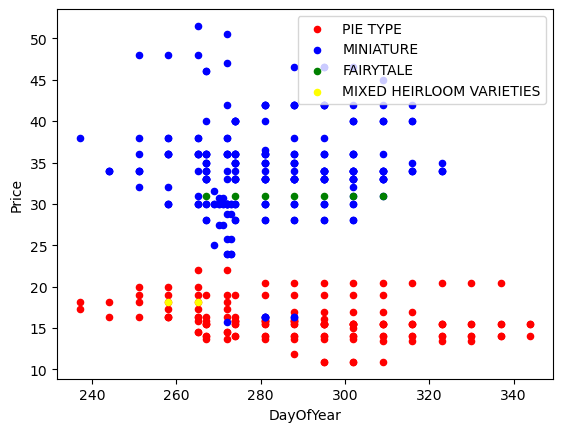

In [3]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

Our investigation suggests that variety has more effect on the overall price than the actual selling date. We can see this with a bar graph:

<Axes: xlabel='Variety'>

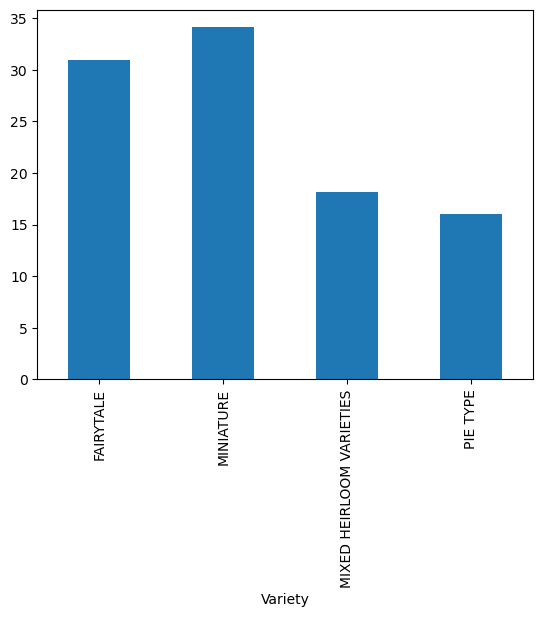

In [4]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

Let us focus for the moment only on one pumpkin variety, the 'pie type', and see what effect the date has on the price:

<Axes: xlabel='DayOfYear', ylabel='Price'>

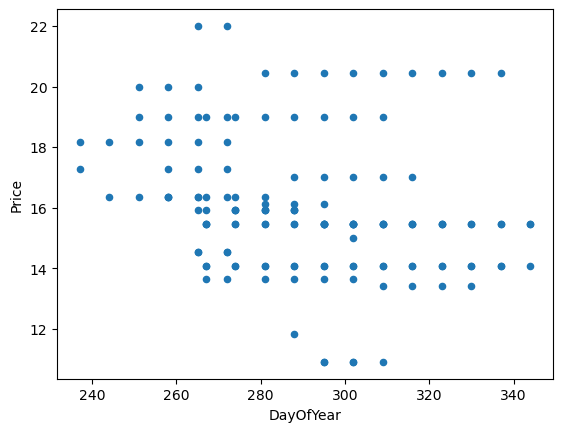

In [5]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price') 

If we now calculate the correlation between `Price` and `DayOfYear` using `corr` function, we will get something like `-0.27` - which means that training a predictive model makes sense.

> Before training a linear regression model, it is important to make sure that our data is clean. Linear regression does not work well with missing values, thus it makes sense to get rid of all empty cells:

In [6]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  144 non-null    int64  
 1   Month       144 non-null    int64  
 2   DayOfYear   144 non-null    int64  
 3   Variety     144 non-null    object 
 4   City        144 non-null    object 
 5   Package     144 non-null    object 
 6   Low Price   144 non-null    float64
 7   High Price  144 non-null    float64
 8   Price       144 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


C:\Users\aminu\AppData\Local\Temp\ipykernel_14684\3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


Another approach would be to fill those empty values with mean values from the corresponding column.

## Simple Linear Regression

To train our Linear Regression model, we will use the **Scikit-learn** library.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

We start by separating input values (features) and the expected output (label) into separate numpy arrays:

In [8]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

> Note that we had to perform `reshape` on the input data in order for the Linear Regression package to understand it correctly. Linear Regression expects a 2D-array as an input, where each row of the array corresponds to a vector of input features. In our case, since we have only one input - we need an array with shape N&times;1, where N is the dataset size.

Then, we need to split the data into train and test datasets, so that we can validate our model after training:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Finally, training the actual Linear Regression model takes only two lines of code. We define the `LinearRegression` object, and fit it to our data using the `fit` method:

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

The `LinearRegression` object after `fit`-ting contains all the coefficients of the regression, which can be accessed using `.coef_` property. In our case, there is just one coefficient, which should be around `-0.017`. It means that prices seem to drop a bit with time, but not too much, around 2 cents per day. We can also access the intersection point of the regression with Y-axis using `lin_reg.intercept_` - it will be around `21` in our case, indicating the price at the beginning of the year.

To see how accurate our model is, we can predict prices on a test dataset, and then measure how close our predictions are to the expected values. This can be done using mean square error (MSE) metrics, which is the mean of all squared differences between expected and predicted value.

In [11]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.77 (17.2%)


Our error seems to be around 2 points, which is ~17%. Not too good. Another indicator of model quality is the **coefficient of determination**, which can be obtained like this:

In [12]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.0446060633502835


If the value is 0, it means that the model does not take input data into account, and acts as the *worst linear predictor*, which is simply a mean value of the result. The value of 1 means that we can perfectly predict all expected outputs. In our case, the coefficient is around 0.06, which is quite low.

We can also plot the test data together with the regression line to better see how regression works in our case:

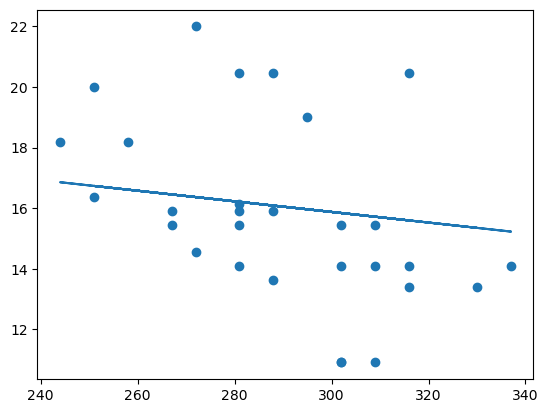

In [13]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

## Polynomial Regression

Another type of Linear Regression is Polynomial Regression. While sometimes there's a linear relationship between variables - the bigger the pumpkin in volume, the higher the price - sometimes these relationships can't be plotted as a plane or straight line. 

✅ Here are [some more examples](https://online.stat.psu.edu/stat501/lesson/9/9.8) of data that could use Polynomial Regression

Take another look at the relationship between Date and Price. Does this scatterplot seem like it should necessarily be analyzed by a straight line? Can't prices fluctuate? In this case, you can try polynomial regression.

✅ Polynomials are mathematical expressions that might consist of one or more variables and coefficients

Polynomial regression creates a curved line to better fit nonlinear data. In our case, if we include a squared `DayOfYear` variable into input data, we should be able to fit our data with a parabolic curve, which will have a minimum at a certain point within the year.

Scikit-learn includes a helpful [pipeline API](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html?highlight=pipeline#sklearn.pipeline.make_pipeline) to combine different steps of data processing together. A **pipeline** is a chain of **estimators**. In our case, we will create a pipeline that first adds polynomial features to our model, and then trains the regression:

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Using `PolynomialFeatures(2)` means that we will include all second-degree polynomials from the input data. In our case it will just mean `DayOfYear`<sup>2</sup>, but given two input variables X and Y, this will add X<sup>2</sup>, XY and Y<sup>2</sup>. We may also use higher degree polynomials if we want.

Pipelines can be used in the same manner as the original `LinearRegression` object, i.e. we can `fit` the pipeline, and then use `predict` to get the prediction results. Here is the graph showing test data, and the approximation curve:
 
<img alt="Polynomial regression" src="images/poly-results.png" width="50%" />

Using Polynomial Regression, we can get slightly lower MSE and higher determination, but not significantly. We need to take into account other features!

> You can see that the minimal pumpkin prices are observed somewhere around Halloween. How can you explain this? 

🎃 Congratulations, you just created a model that can help predict the price of pie pumpkins. You can probably repeat the same procedure for all pumpkin types, but that would be tedious. Let's learn now how to take pumpkin variety into account in our model!

## Categorical Features

In the ideal world, we want to be able to predict prices for different pumpkin varieties using the same model. However, the `Variety` column is somewhat different from columns like `Month`, because it contains non-numeric values. Such columns are called **categorical**.

Here you can see how average price depends on variety:

<img alt="Average price by variety" src="images/price-by-variety.png" width="50%" />

To take variety into account, we first need to convert it to numeric form, or **encode** it. There are several way we can do it:

* Simple **numeric encoding** will build a table of different varieties, and then replace the variety name by an index in that table. This is not the best idea for linear regression, because linear regression takes the actual numeric value of the index, and adds it to the result, multiplying by some coefficient. In our case, the relationship between the index number and the price is clearly non-linear, even if we make sure that indices are ordered in some specific way.
* **One-hot encoding** will replace the `Variety` column by 4 different columns, one for each variety. Each column will contain `1` if the corresponding row is of a given variety, and `0` otherwise. This means that there will be four coefficients in linear regression, one for each pumpkin variety, responsible for "starting price" (or rather "additional price") for that particular variety.

The code below shows how we can one-hot encode a variety:

In [15]:
pd.get_dummies(new_pumpkins['Variety'])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
410,False,True,False,False
411,False,True,False,False
412,False,True,False,False
413,False,True,False,False


 ID | FAIRYTALE | MINIATURE | MIXED HEIRLOOM VARIETIES | PIE TYPE
----|-----------|-----------|--------------------------|----------
70 | 0 | 0 | 0 | 1
71 | 0 | 0 | 0 | 1
... | ... | ... | ... | ...
1738 | 0 | 1 | 0 | 0
1739 | 0 | 1 | 0 | 0
1740 | 0 | 1 | 0 | 0
1741 | 0 | 1 | 0 | 0
1742 | 0 | 1 | 0 | 0

To train linear regression using one-hot encoded variety as input, we just need to initialize `X` and `y` data correctly:

In [16]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

The rest of the code is the same as what we used above to train Linear Regression. If you try it, you will see that the mean squared error is about the same, but we get much higher coefficient of determination (~77%). To get even more accurate predictions, we can take more categorical features into account, as well as numeric features, such as `Month` or `DayOfYear`. To get one large array of features, we can use `join`:

In [17]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

Here we also take into account `City` and `Package` type, which gives us MSE 2.84 (10%), and determination 0.94!

## Putting it all together

To make the best model, we can use combined (one-hot encoded categorical + numeric) data from the above example together with Polynomial Regression. Here is the complete code for your convenience:

In [18]:
# set up training data
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.28%)
Model determination:  0.9653029999448537


This should give us the best determination coefficient of almost 97%, and MSE=2.23 (~8% prediction error).

| Model | MSE | Determination |
|-------|-----|---------------|
| `DayOfYear` Linear | 2.77 (17.2%) | 0.07 |
| `DayOfYear` Polynomial | 2.73 (17.0%) | 0.08 |
| `Variety` Linear | 5.24 (19.7%) | 0.77 |
| All features Linear | 2.84 (10.5%) | 0.94 |
| All features Polynomial | 2.23 (8.25%) | 0.97 |

🏆 Well done! You created four Regression models in one lesson, and improved the model quality to 97%. In the final section on Regression, you will learn about Logistic Regression to determine categories. 

---
## 🚀Challenge

Test several different variables in this notebook to see how correlation corresponds to model accuracy.

## Review & Self Study

In this lesson we learned about Linear Regression. There are other important types of Regression. Read about Stepwise, Ridge, Lasso and Elasticnet techniques. A good course to study to learn more is the [Stanford Statistical Learning course](https://online.stanford.edu/courses/sohs-ystatslearning-statistical-learning)